# Importing the cleaned reddit csv with data from a varieyt of sub reddits

In [42]:
import pandas as pd
df = pd.read_csv("/Users/gauthamiaithal/Local_Documents/MS DS/Spring 23/Text Mining/Data Extraction/Reddit/Cleaned_Combined_Reddit_data.csv")

In [43]:
df.describe()

,Post,Label
count,1926,1926
unique,1593,874
top,top scientists warn of ghastly future of mass ...,climate
freq,14,87


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


In [45]:
documents = df['Post']


In [46]:
documents.head()

0    in the global race to dominate green technolog...
1    embrace what may be the most important green t...
2    carbontax policy that reduces carbon emissions...
3    toyota rethinks ev strategy with new ceo  the ...
4    embrace what may be the most important green t...
Name: Post, dtype: object

In [47]:
vectorizor = TfidfVectorizer(stop_words= 'english')
features = vectorizor.fit_transform(documents)


In [48]:
features

<1926x5783 sparse matrix of type '<class 'numpy.float64'>'
	with 21171 stored elements in Compressed Sparse Row format>

In [49]:
data_tfidf = pd.DataFrame(data=features.todense(), columns=vectorizor.get_feature_names_out())
# data_tfidf['Label'] = data_df['Label']
# data_tfidf[data_tfidf[''] != 0.0]
data_tfidf.head(10)

,aahi,abbotsford,abbott,abc,ability,able,abmbonsk,abnormal,aboriginal,abound,...,zen,zero,zh,zone,zones,zoo,zoological,zoom,zsl,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


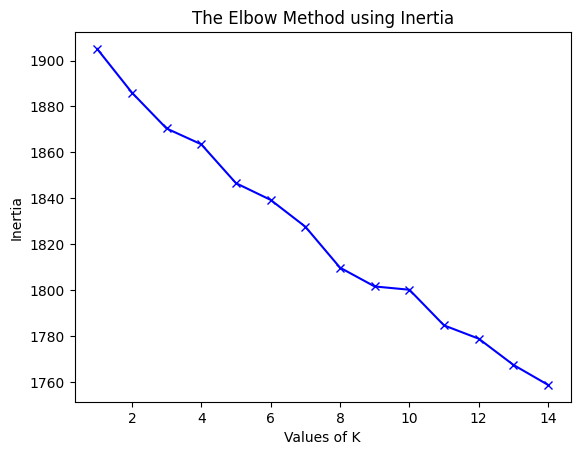

In [50]:
import matplotlib.pyplot as plt
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(features)
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [51]:
k= 9
model = KMeans(n_clusters=k, init='k-means++', max_iter=100,n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=9, n_init=1)

In [52]:
df['cluster'] = model.labels_

In [53]:
df.head()

,Post,Label,cluster
0,in the global race to dominate green technolog...,ukpolitics,6
1,embrace what may be the most important green t...,Futurology,6
2,carbontax policy that reduces carbon emissions...,science,4
3,toyota rethinks ev strategy with new ceo the ...,RealTesla,1
4,embrace what may be the most important green t...,collapse,6


In [54]:
clusters = df.groupby('cluster')


In [183]:
# for cluster in clusters.groups:
#     f = open ('cluster' + str(cluster) + '.csv','w')
#     data = clusters.get_group(cluster)[['Post','Label']]
#     f.write

In [55]:
print('Cluster Centroids: \n')
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizor.get_feature_names_out()

Cluster Centroids: 



In [185]:
# model.cluster_centers_

In [186]:
# order_centroids

In [56]:
for i in range(k):
    print(f"Cluster {i}: ")
    for j in order_centroids[i, :10]:
        # print(j)
        print(f'{terms[j]}')
    print(f'--------------')

Cluster 0: 
scientists
ghastly
mass
extinction
warn
future
disruption
climate
professionals
declare
--------------
Cluster 1: 
stewardship
climate
change
new
earth
study
global
variations
years
warming
--------------
Cluster 2: 
chinas
momentum
losing
renewable
transition
energy
yale
bioorganic
conforms
leading
--------------
Cluster 3: 
development
sustainable
goals
equality
environment
economic
fairer
opposes
votes
sdg
--------------
Cluster 4: 
carbon
reduction
targets
uk
climate
universities
china
new
reductions
hit
--------------
Cluster 5: 
climate
action
crisis
emergency
mitigation
resilience
adaptation
disruption
world
says
--------------
Cluster 6: 
energy
transition
renewable
green
technology
embrace
save
important
metals
monbiot
--------------
Cluster 7: 
environmental
conservation
change
changes
responsible
promote
nys
make
think
impact
--------------
Cluster 8: 
greenhouse
effect
warming
global
atmosphere
weather
ecological
climate
nasa
improve
--------------


In [188]:
# from sklearn.preprocessing import StandardScaler
# import seaborn as sns
# Sc = StandardScaler()
# # X = Sc.fit_transform(features.toarray())
# X = features.toarray()
# pca = PCA(2) 
# pca_data = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2']) 
# kmeans =KMeans(n_clusters=3).fit(X)
# pca_data['cluster'] = pd.Categorical(kmeans.labels_)
# sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

In [57]:
x = features.toarray()

In [58]:
from sklearn.decomposition import PCA
pca = PCA(2)

In [59]:
data = pca.fit_transform(features.toarray())


In [15]:
model1 = KMeans(n_clusters = 4, init = "k-means++")
label = model1.fit_predict(features.toarray())
print(label)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 2 1 ... 3 3 3]


In [60]:

model2 = KMeans(n_clusters = 9, init = "k-means++")
y2 = model2.fit_predict(x)
     

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


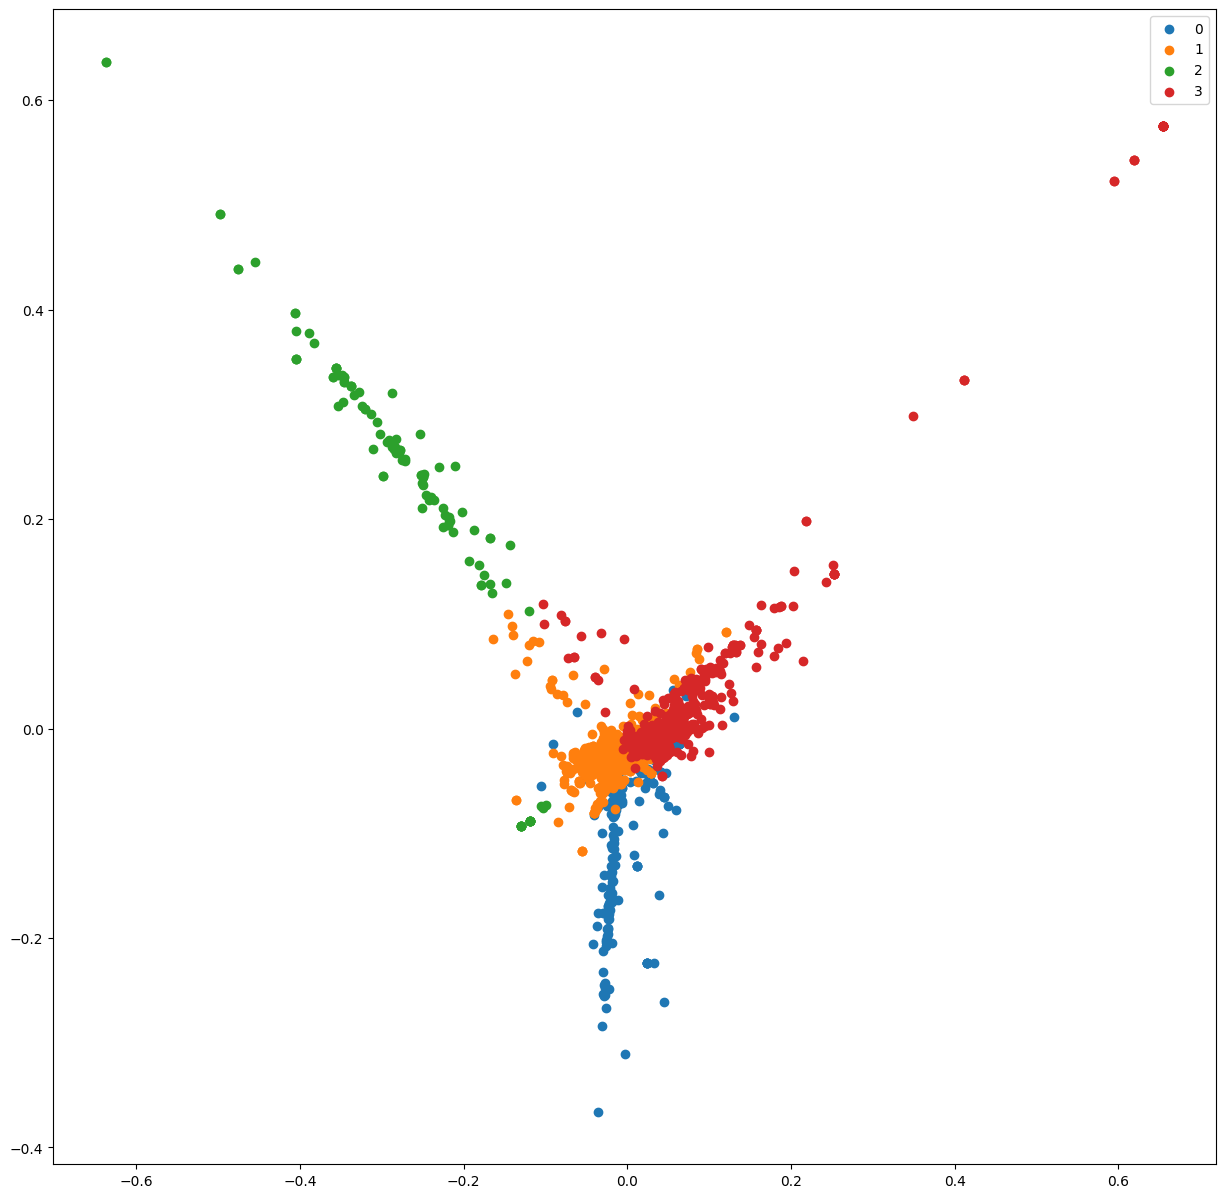

In [61]:
import numpy as np
plt.figure(figsize=(15,15))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
  
plt.legend()
plt.show()

In [62]:
label2 = model2.fit_predict(data)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


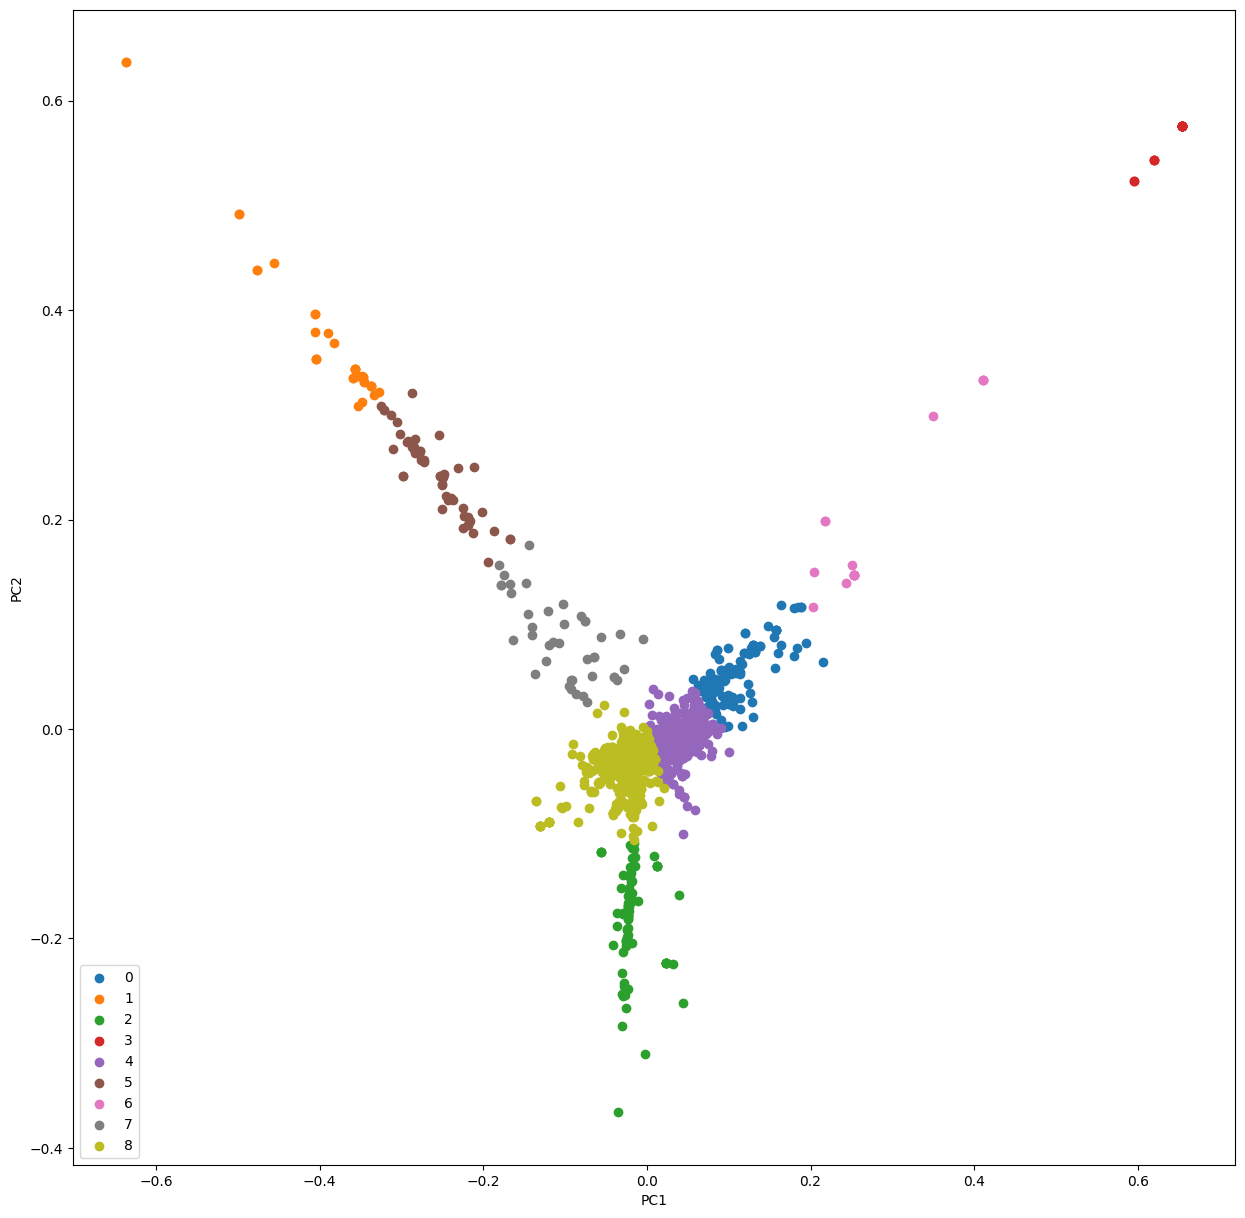

In [63]:
plt.figure(figsize=(15,15))
uniq = np.unique(label2)
for i in uniq:
  plt.scatter(data[label2 == i , 0] , data[label2 == i , 1] , label = i)
plt.xlabel([])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [23]:
centers = np.array(model2.cluster_centers_)

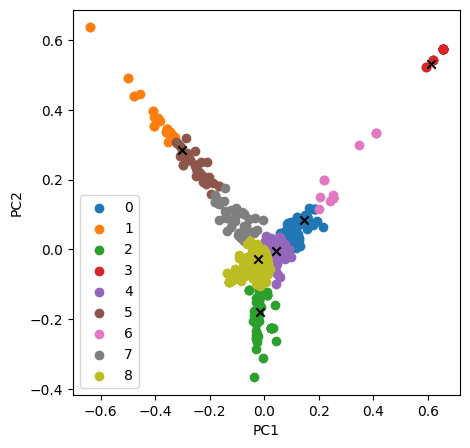

In [66]:
plt.figure(figsize=(5,5))
uniq = np.unique(label2)

for i in uniq:
  plt.scatter(data[label2 == i , 0] , data[label2 == i , 1] , label = i)
plt.xlabel([])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.legend()
plt.show()
